In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image

# Replace this path with your actual dataset directory path
dataset_path = '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'

# List all subdirectories in the main dataset directory
subdirectories = [subdir for subdir in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, subdir))]

# Loop through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(dataset_path, subdir)

    # List all image files in the current subdirectory
    image_files = [img_file for img_file in os.listdir(subdir_path) if img_file.endswith('.jpg') or img_file.endswith('.png')]

    # Loop through each image file in the subdirectory
    for img_file in image_files:
        img_path = os.path.join(subdir_path, img_file)

        # Load the image using PIL or any other image processing library you prefer
        image = Image.open(img_path)



Accuracy: 0.975904
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.99      0.99      0.99       261
           2       0.94      0.98      0.96       132

    accuracy                           0.98       415
   macro avg       0.98      0.92      0.94       415
weighted avg       0.98      0.98      0.98       415



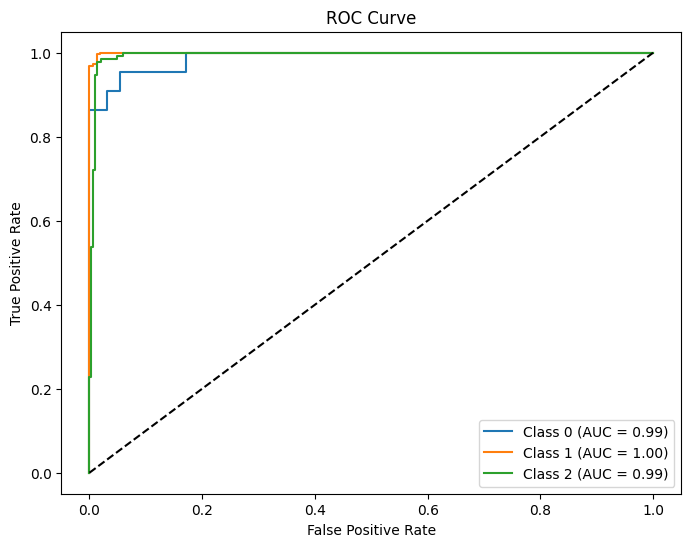

In [ ]:
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder = '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'  # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)  # max_iter specifies the maximum number of iterations

# Training the model
logistic_regression.fit(X_train, y_train)

# Predicting on the test set
predictions = logistic_regression.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))

# Calculate probabilities for each class
probs = logistic_regression.predict_proba(X_test)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_curve_all = dict()
for i in range(3):  # Assuming you have three classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_curve_all[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming you have three classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_curve_all[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.968675
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        22
           1       0.98      1.00      0.99       261
           2       0.94      0.96      0.95       132

    accuracy                           0.97       415
   macro avg       0.97      0.87      0.91       415
weighted avg       0.97      0.97      0.97       415



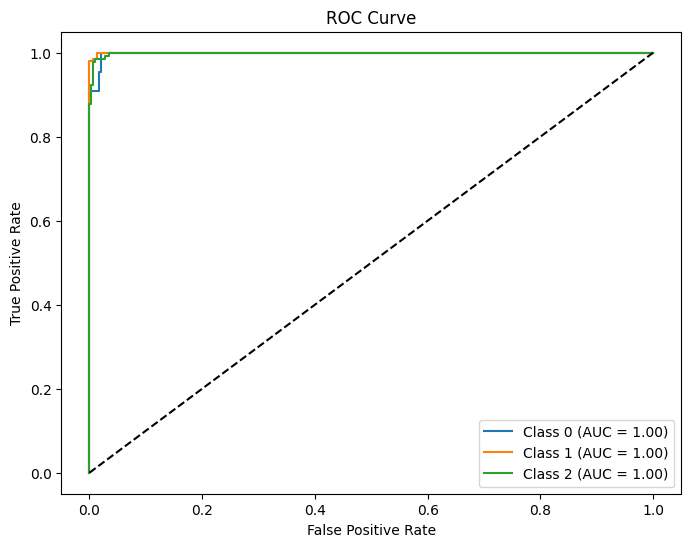

In [ ]:
#Logistic regression
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder = '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'   # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model (Support Vector Machine classifier)
svm_classifier = SVC(kernel='rbf', C=1.0, probability=True)  # You can adjust the kernel and other parameters here

# Training the model
svm_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = svm_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))

# Compute probabilities for each class
probs = svm_classifier.predict_proba(X_test)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_curve_all = dict()
for i in range(3):  # Assuming you have three classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_curve_all[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming you have three classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_curve_all[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.939759
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        22
           1       0.96      0.99      0.97       261
           2       0.90      0.92      0.91       132

    accuracy                           0.94       415
   macro avg       0.95      0.80      0.85       415
weighted avg       0.94      0.94      0.94       415

F1 Score: 0.94
Precision: 0.94


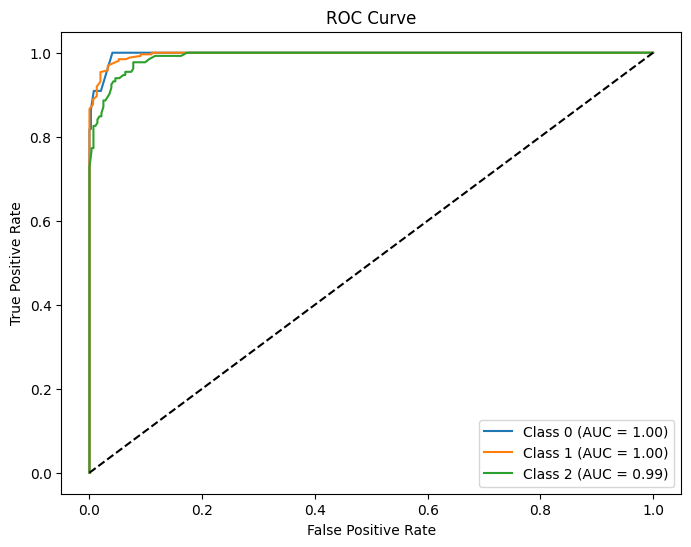

In [ ]:
#SVM
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_curve, auc
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder =  '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'  # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) and other parameters here

# Training the model
random_forest_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = random_forest_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))

# Calculate F1 score and precision
f1 = f1_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")

# Calculate probabilities for each class
probs = random_forest_classifier.predict_proba(X_test)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have three classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming you have three classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.971084
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        22
           1       0.99      0.99      0.99       261
           2       0.94      0.98      0.96       132

    accuracy                           0.97       415
   macro avg       0.97      0.87      0.91       415
weighted avg       0.97      0.97      0.97       415

F1 Score: 0.969296
Precision: 0.972204


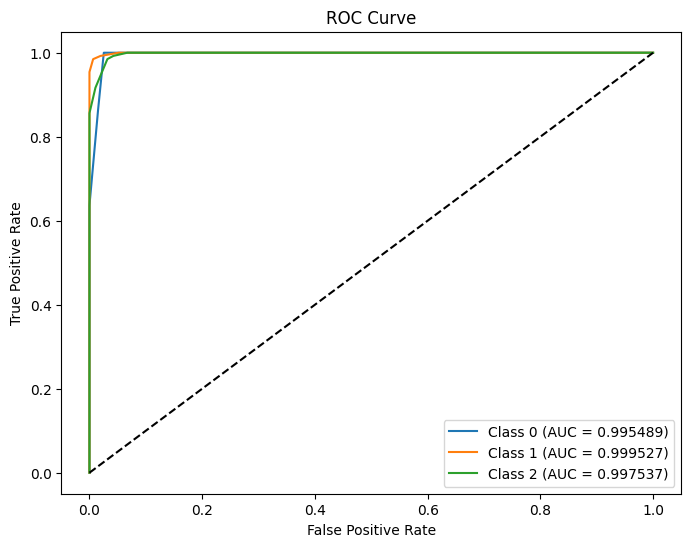

In [ ]:
#KNN
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_score, f1_score
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder = '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset' # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) and other parameters here

# Training the model
knn_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = knn_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))

# Calculate F1 score and precision
f1 = f1_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1:.6f}")
print(f"Precision: {precision:.6f}")

# Calculate probabilities for each class
probs = knn_classifier.predict_proba(X_test)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have three classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming you have three classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.6f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
#Naive Bayes
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import os
import numpy as np

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder ='/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'  # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
naive_bayes_classifier = GaussianNB()

# Training the model
naive_bayes_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = naive_bayes_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))


Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.20      0.86      0.32        22
           1       0.83      0.75      0.78       261
           2       0.50      0.32      0.39       132

    accuracy                           0.62       415
   macro avg       0.51      0.64      0.50       415
weighted avg       0.69      0.62      0.63       415



In [ ]:
#Desicion Trees
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import numpy as np

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder ='/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset' # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
decision_tree_classifier = DecisionTreeClassifier()

# Training the model
decision_tree_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = decision_tree_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))


Accuracy: 0.898795
              precision    recall  f1-score   support

           0       0.54      0.68      0.60        22
           1       0.95      0.95      0.95       261
           2       0.88      0.83      0.86       132

    accuracy                           0.90       415
   macro avg       0.79      0.82      0.80       415
weighted avg       0.90      0.90      0.90       415



In [ ]:
#XG Boost
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import numpy as np

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder ='/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset' # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_classifier = XGBClassifier()

# Training the model
xgb_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = xgb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))


Accuracy: 0.973494
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.98      1.00      0.99       261
           2       0.95      0.96      0.96       132

    accuracy                           0.97       415
   macro avg       0.98      0.91      0.94       415
weighted avg       0.97      0.97      0.97       415



In [ ]:
#Ada Boost
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import numpy as np

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder = '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset' # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost model
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)  # You can adjust the number of estimators here

# Training the model
ada_boost_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = ada_boost_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Getting detailed metrics
print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.785542
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        22
           1       0.90      0.84      0.87       261
           2       0.64      0.74      0.69       132

    accuracy                           0.79       415
   macro avg       0.69      0.68      0.68       415
weighted avg       0.80      0.79      0.79       415



In [ ]:
#Bagging
from skimage.feature import hog
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import numpy as np

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder ='/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'# Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert images to HOG features
hog_features = []
for image in images:
    # Extract HOG features
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    hog_features.append(features)

# Convert the lists to numpy arrays
X = np.array(hog_features)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimator for Bagging
base_estimator = DecisionTreeClassifier()

# Initialize the Bagging model
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)  # You can adjust the number of estimators here

# Training the model
bagging_classifier.fit(X_train, y_train)

# Predicting on the test set
predictions = bagging_classifier.predict(X_test)

# Calculating accuracy, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
precision_recall_f1 = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Precision, Recall, F1 Score:")
print(precision_recall_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.95
Precision, Recall, F1 Score:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.97      0.98      0.98       261
           2       0.92      0.92      0.92       132

    accuracy                           0.95       415
   macro avg       0.90      0.85      0.87       415
weighted avg       0.95      0.95      0.95       415



Epoch 1/100
52/52 [==============================] - 27s 497ms/step - loss: 0.8436 - accuracy: 0.6502 - val_loss: 0.8166 - val_accuracy: 0.6289
Epoch 2/100
52/52 [==============================] - 25s 492ms/step - loss: 0.8214 - accuracy: 0.6502 - val_loss: 0.8470 - val_accuracy: 0.6289
Epoch 3/100
52/52 [==============================] - 24s 456ms/step - loss: 0.8190 - accuracy: 0.6502 - val_loss: 0.8165 - val_accuracy: 0.6289
Epoch 4/100
52/52 [==============================] - 22s 429ms/step - loss: 0.8058 - accuracy: 0.6502 - val_loss: 0.8105 - val_accuracy: 0.6289
Epoch 5/100
52/52 [==============================] - 24s 455ms/step - loss: 0.7917 - accuracy: 0.6502 - val_loss: 0.7329 - val_accuracy: 0.6289
Epoch 6/100
52/52 [==============================] - 25s 483ms/step - loss: 0.6786 - accuracy: 0.6960 - val_loss: 0.6902 - val_accuracy: 0.6289
Epoch 7/100
52/52 [==============================] - 22s 430ms/step - loss: 0.6049 - accuracy: 0.7419 - val_loss: 0.5308 - val_accuracy:

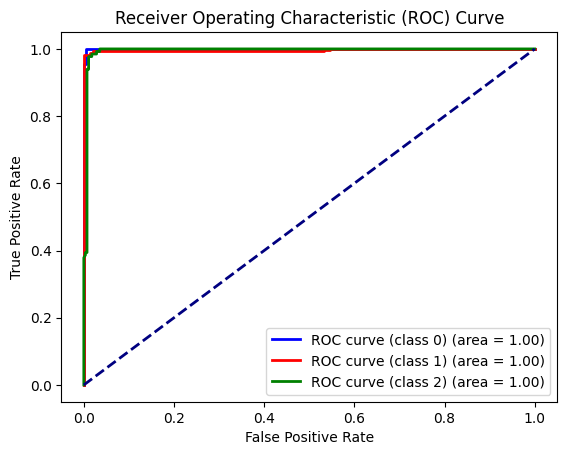

In [ ]:
#CNN
import os
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels


# Load images and labels
data_folder ='/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset' # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Reshape the data for CNN input (add a color channel)
X = X.reshape(-1, 100, 100, 1)

# Normalize pixel values between 0 and 1
X = X.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predicting on the test set
predictions = model.predict(X_test)

# Convert predictions to classes
y_pred_classes = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred_classes)
precision_recall_f1 = classification_report(y_true, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Precision, Recall, F1 Score:")
print(precision_recall_f1)

# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming three classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve
plt.figure()
colors = ['blue', 'red', 'green']  # Change colors as needed
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#RBM
from skimage.feature import hog
from skimage import io, transform
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.neural_network import BernoulliRBM
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                # Extract HOG features
                hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                                   cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
                images.append(hog_features)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder = '/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'  # Replace this with your data folder path
images, labels = load_images_from_folder(data_folder)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RBM model
rbm = BernoulliRBM(n_components=128)

# Fit RBM model to data
X_train_rbm = rbm.fit_transform(X_train)
X_test_rbm = rbm.transform(X_test)

# Define the classifier model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_rbm.shape[1],)))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_rbm, y_train, epochs=100, batch_size=32, validation_data=(X_test_rbm, y_test))

# Evaluate the model and print accuracy
loss, accuracy = model.evaluate(X_test_rbm, y_test)
print(f"Accuracy: {accuracy:.6f}")

# Predictions
predictions = model.predict(X_test_rbm)

# Get classification report (precision, recall, f1-score)
report = classification_report(y_test, np.argmax(predictions, axis=1))
print("Classification Report:\n", report)





Epoch 1/100
52/52 [==============================] - 1s 7ms/step - loss: 0.8001 - accuracy: 0.6520 - val_loss: 0.6708 - val_accuracy: 0.6988
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7708 - val_loss: 0.5872 - val_accuracy: 0.7494
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7714 - val_loss: 0.5439 - val_accuracy: 0.7494
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7793 - val_loss: 0.5212 - val_accuracy: 0.7542
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7859 - val_loss: 0.5086 - val_accuracy: 0.7639
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7931 - val_loss: 0.4788 - val_accuracy: 0.7952
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.8160 - val_loss: 0.4656 - val_accuracy: 0.7928
Epoch 8/100
5

In [ ]:
#LSTM+XGBoost
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import xgboost as xgb

# Function to load and preprocess images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join(folder, label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names
    return images, labels

# Load images and labels
data_folder ='/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset'
images, labels = load_images_from_folder(data_folder)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Splitting the dataset into training and testing sets for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (sequence length, features)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, -1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, -1)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=200, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Train XGBoost on the same data
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_lstm.reshape(X_train_lstm.shape[0], -1), y_train_lstm)

# Predictions from LSTM model
lstm_probabilities = lstm_model.predict(X_test_lstm)
lstm_predictions = np.argmax(lstm_probabilities, axis=1)


# Predictions from XGBoost model
xgb_predictions = xgb_model.predict(X_test_lstm.reshape(X_test_lstm.shape[0], -1))

# Combine predictions from both models (you can use any technique like voting, averaging, or stacking)
ensemble_predictions = (lstm_predictions + xgb_predictions) / 2  # Example of simple averaging

# Evaluate ensemble predictions
ensemble_accuracy = np.mean(ensemble_predictions == y_test_lstm)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Epoch 1/200
52/52 [==============================] - 8s 101ms/step - loss: 0.7390 - accuracy: 0.6556 - val_loss: 0.6173 - val_accuracy: 0.7639
Epoch 2/200
52/52 [==============================] - 4s 73ms/step - loss: 0.5928 - accuracy: 0.7732 - val_loss: 0.5743 - val_accuracy: 0.7928
Epoch 3/200
52/52 [==============================] - 4s 73ms/step - loss: 0.5105 - accuracy: 0.8245 - val_loss: 0.4805 - val_accuracy: 0.8361
Epoch 4/200
52/52 [==============================] - 4s 81ms/step - loss: 0.4487 - accuracy: 0.8474 - val_loss: 0.4740 - val_accuracy: 0.8675
Epoch 5/200
52/52 [==============================] - 4s 80ms/step - loss: 0.4103 - accuracy: 0.8733 - val_loss: 0.3893 - val_accuracy: 0.8940
Epoch 6/200
52/52 [==============================] - 4s 73ms/step - loss: 0.3494 - accuracy: 0.8999 - val_loss: 0.3944 - val_accuracy: 0.8434
Epoch 7/200
52/52 [==============================] - 4s 73ms/step - loss: 0.3580 - accuracy: 0.8818 - val_loss: 0.3292 - val_accuracy: 0.8964
Epoch

In [ ]:
#CNN+LSTM+XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np
import os
from skimage import io, transform

# Function to load and preprocess images from folders
def load_images_and_labels():
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        # Assuming the path structure is similar to the provided data_folder path
        path = os.path.join('/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset', label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)  # Read images as grayscale
            if img is not None:
                img = transform.resize(img, (100, 100))  # Resize images to a consistent size
                images.append(img)
                labels.append(label)  # Assigning labels based on folder names

    # Convert lists to numpy arrays
    X = np.array(images)
    y = np.array(labels)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for CNN input (add a color channel)
    X_train = X_train.reshape(-1, 100, 100, 1)
    X_test = X_test.reshape(-1, 100, 100, 1)

    # Normalize pixel values between 0 and 1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Convert labels to categorical (one-hot encoding)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

# Load images and labels
X_train, X_test, y_train, y_test = load_images_and_labels()

# CNN model architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# LSTM model architecture
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3, activation='softmax')
])

# Compile the LSTM model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Get predictions from CNN and LSTM models
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)

# Concatenate predictions for ensemble
ensemble_X = np.column_stack((cnn_predictions, lstm_predictions))

# Initialize XGBoost classifier for ensemble
xgb_ensemble = XGBClassifier()

# Train the XGBoost ensemble model
xgb_ensemble.fit(ensemble_X, y_test.argmax(axis=1))

# Get predictions from ensemble
ensemble_predictions = xgb_ensemble.predict(ensemble_X)

# Calculate accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test.argmax(axis=1), ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Epoch 1/100
52/52 [==============================] - 22s 403ms/step - loss: 0.8293 - accuracy: 0.6435 - val_loss: 0.8054 - val_accuracy: 0.6289
Epoch 2/100
52/52 [==============================] - 19s 370ms/step - loss: 0.7862 - accuracy: 0.6502 - val_loss: 0.7573 - val_accuracy: 0.6289
Epoch 3/100
52/52 [==============================] - 19s 370ms/step - loss: 0.7367 - accuracy: 0.6725 - val_loss: 0.7196 - val_accuracy: 0.6289
Epoch 4/100
52/52 [==============================] - 20s 387ms/step - loss: 0.6836 - accuracy: 0.7033 - val_loss: 0.6808 - val_accuracy: 0.7133
Epoch 5/100
52/52 [==============================] - 19s 359ms/step - loss: 0.6227 - accuracy: 0.7244 - val_loss: 0.6068 - val_accuracy: 0.7181
Epoch 6/100
52/52 [==============================] - 21s 409ms/step - loss: 0.5699 - accuracy: 0.7521 - val_loss: 0.5353 - val_accuracy: 0.7807
Epoch 7/100
52/52 [==============================] - 20s 387ms/step - loss: 0.5372 - accuracy: 0.7762 - val_loss: 0.4868 - val_accuracy:

13/13 [==============================] - 2s 101ms/step
Stacking Ensemble Accuracy: 94.94%


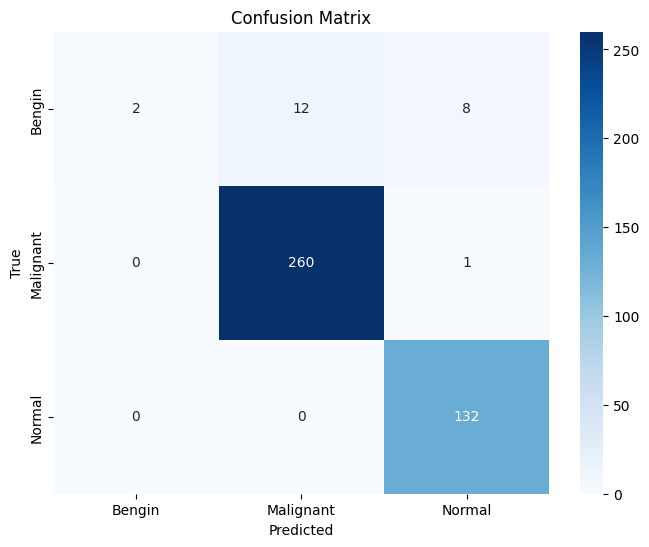

Accuracy: 94.94%
Precision: 95.20%
Recall: 94.94%


In [ ]:
import numpy as np
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Function to load and preprocess images from folders
def load_images_and_labels():
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join('/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset', label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)
            if img is not None:
                img = transform.resize(img, (100, 100))
                images.append(img)
                labels.append(label)

    X = np.array(images)
    y = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.reshape(-1, 100, 100, 1)
    X_test = X_test.reshape(-1, 100, 100, 1)

    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

# Load images and labels
X_train, X_test, y_train, y_test = load_images_and_labels()

# Base models
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3, activation='softmax')
])

svm_model = SVC(probability=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train base models
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

svm_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
rf_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))

# Get predictions from base models
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)
svm_predictions = svm_model.predict(X_test.reshape(X_test.shape[0], -1))
rf_predictions = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Create a new dataset with base model predictions
stacking_X = np.column_stack((lstm_predictions, svm_predictions, rf_predictions))

# Meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Train the meta-model on the base model predictions
meta_model.fit(stacking_X, np.argmax(y_test, axis=1))

# Make final predictions using the stacking ensemble
stacking_predictions = meta_model.predict(stacking_X)

# Calculate accuracy of the stacking ensemble
stacking_accuracy = accuracy_score(np.argmax(y_test, axis=1), stacking_predictions)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy * 100:.2f}%")


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()





# Function to display numerical values for accuracy, precision, and recall
def display_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")

# Plot confusion matrix
plot_confusion_matrix(np.argmax(y_test, axis=1), stacking_predictions, classes=['Bengin', 'Malignant', 'Normal'])



# Display numerical values for accuracy, precision, and recall
display_metrics(np.argmax(y_test, axis=1), stacking_predictions)



13/13 [==============================] - 1s 66ms/step
Stacking Ensemble Accuracy: 98.55%
Stacking Ensemble Precision: 98.58%
Stacking Ensemble Recall: 98.55%


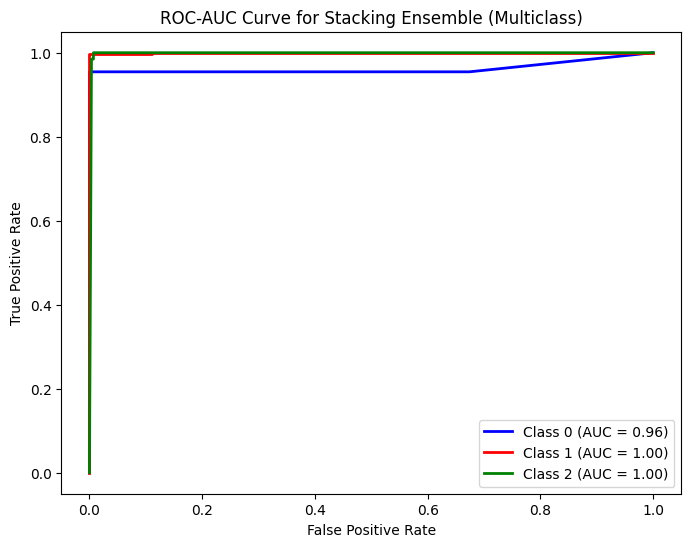

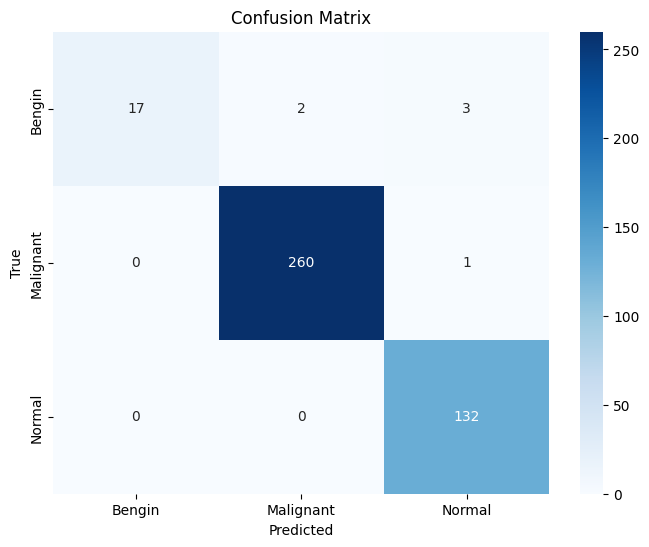

['stacking_ensemble_model.pkl']

In [ ]:
import numpy as np
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Function to load and preprocess images from folders
def load_images_and_labels():
    images = []
    labels = []
    for label, label_folder in enumerate(['Bengin cases', 'Malignant cases', 'Normal cases']):
        path = os.path.join('/content/drive/MyDrive/CTscanDataset/Data/The IQ-OTHNCCD lung cancer dataset', label_folder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = io.imread(img_path, as_gray=True)
            if img is not None:
                img = transform.resize(img, (100, 100))
                images.append(img)
                labels.append(label)

    X = np.array(images)
    y = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.reshape(-1, 100, 100, 1)
    X_test = X_test.reshape(-1, 100, 100, 1)

    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
  1
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

# Load images and labels
X_train, X_test, y_train, y_test = load_images_and_labels()

# Base models
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])


xgb_model = XGBClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True)

# Train base models
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)


xgb_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
rf_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
svm_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))

# Get predictions from base models
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)
xgb_predictions = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))
rf_predictions = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
svm_predictions = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

# Create a new dataset with base model predictions
stacking_X = np.column_stack((cnn_predictions, xgb_predictions, rf_predictions, svm_predictions))

# Meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Train the meta-model on the base model predictions using cross_val_predict
meta_model.fit(stacking_X, np.argmax(y_test, axis=1))

# Make final predictions using the stacking ensemble
stacking_predictions = meta_model.predict(stacking_X)

# Calculate accuracy, precision, and recall
stacking_accuracy = accuracy_score(np.argmax(y_test, axis=1), stacking_predictions)
stacking_precision = precision_score(np.argmax(y_test, axis=1), stacking_predictions, average='weighted')
stacking_recall = recall_score(np.argmax(y_test, axis=1), stacking_predictions, average='weighted')

# Display numerical values for accuracy, precision, and recall
print(f"Stacking Ensemble Accuracy: {stacking_accuracy*100:.2f}%")
print(f"Stacking Ensemble Precision: {stacking_precision*100:.2f}%")
print(f"Stacking Ensemble Recall: {stacking_recall*100:.2f}%")

# Plot ROC-AUC curve for multiclass
stacking_pred_proba = meta_model.predict_proba(stacking_X)

def plot_roc_curve_multiclass(y_true, y_pred_proba, n_classes):
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])  # Adjust classes based on your problem

    plt.figure(figsize=(8, 6))

    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for each class using a one-vs-rest strategy
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc:.2f})')

    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Stacking Ensemble (Multiclass)')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC-AUC curve for multiclass
plot_roc_curve_multiclass(np.argmax(y_test, axis=1), stacking_pred_proba, n_classes=3)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot confusion matrix
plot_confusion_matrix(np.argmax(y_test, axis=1), stacking_predictions, classes=['Bengin', 'Malignant', 'Normal'])

# Save the meta-model (Logistic Regression)
joblib.dump(meta_model, 'stacking_ensemble_model.pkl')

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved stacking ensemble model
stacking_ensemble_model = joblib.load('stacking_ensemble_model.pkl')

# Function to preprocess uploaded image
def preprocess_uploaded_image(uploaded_image):
    img = image.img_to_array(uploaded_image)
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Upload image
uploaded_file = files.upload()

# Get uploaded image path
uploaded_image_path = next(iter(uploaded_file))

# Load and preprocess uploaded image
uploaded_image = image.load_img(uploaded_image_path, target_size=(100, 100), color_mode='grayscale')
preprocessed_image = preprocess_uploaded_image(uploaded_image)

# Get predictions from the base models
cnn_predictions = np.argmax(cnn_model.predict(preprocessed_image), axis=1)
xgb_predictions = xgb_model.predict(preprocessed_image.reshape(1, -1))
rf_predictions = rf_model.predict(preprocessed_image.reshape(1, -1))
svm_predictions = svm_model.predict(preprocessed_image.reshape(1, -1))

# Create a new dataset with base model predictions
stacking_X = np.column_stack((cnn_predictions, xgb_predictions, rf_predictions, svm_predictions))

# Make prediction using the stacking ensemble model
stacking_predictions = stacking_ensemble_model.predict(stacking_X)

# Print predicted class
predicted_class = np.argmax(stacking_predictions)
if predicted_class == 0:
    print("Predicted class: Bengin")
elif predicted_class == 1:
    print("Predicted class: Malignant")
else:
    print("Predicted class: Normal")


Saving Bengin case (10).jpg to Bengin case (10) (2).jpg
1/1 [==============================] - 0s 37ms/step
Predicted class: Bengin
